In [ ]:
<div style="border: solid blue 2px; padding: 15px; margin: 10px">
  <b>Overall Summary of the Project – Iteration 2</b><br><br>

  Hi Andy, I’m <b>Victor Camargo</b> (<a href="https://hub.tripleten.com/u/e9cc9c11" target="_blank">TripleTen Hub profile</a>). Thanks for addressing all the feedback in your revision — your project is now complete and approved!<br><br>

  <b>Nice work on:</b><br>
  ✔️ Fixing the revenue function to correctly handle overages, base fees, and rounding rules<br>
  ✔️ Updating your revenue analysis to highlight both average and median per-user values<br>
  ✔️ Re-running and clarifying your hypothesis tests with proper H0/Ha and conclusions<br>
  ✔️ Keeping your notebook clean, reproducible, and well-structured with clear explanations<br><br>

  ✅ With these improvements, your project fully meets the requirements. Congratulations on reaching this milestone! 🎉<br><br>

  <b>Keep up the great work — this was a solid project, and you should be proud of the result.</b><br>
</div>


<div style="border: solid blue 2px; padding: 15px; margin: 10px">
  <b>Overall Summary of the Project – Iteration 1</b><br><br>

  Hi Andy, I’m <b>Victor Camargo</b> (<a href="https://hub.tripleten.com/u/e9cc9c11" target="_blank">TripleTen Hub profile</a>). Thanks for submitting your Statistical Data Analysis project!<br><br>

  <b>Nice work on:</b><br>
  ✔️ Careful data preparation — converting dates, rounding call durations, extracting months, and merging user/plan details<br>
  ✔️ Clear exploratory analysis with bar charts, histograms, and boxplots for calls, messages, and internet usage<br>
  ✔️ Thoughtful interpretation of distributions (skewness, outliers, usage behavior differences)<br><br>

  A few things still need your attention before approval:<br>
  • Correct the revenue calculation (Ultimate overage rates, prevent negative overages, apply monthly total rounding, always include base fee)<br>
  • Re-run the revenue analysis once fixed, and emphasize median and per-user averages instead of relying only on totals<br>
  • Revisit your hypothesis testing after the revenue correction, making H0/Ha explicit and commenting on assumptions (normality, variance)<br><br>

  <hr>

  🔹 <b>Legend:</b><br>
  🟢 Green = well done<br>
  🟡 Yellow = suggestions<br>
  🔴 Red = must fix<br>
  🔵 Blue = overall summary<br><br>

  <b>Please ensure</b> all cells run smoothly from top to bottom and display outputs before resubmitting.  
  <b>Kind reminder:</b> keep reviewer comments in place so we can track progress and support you effectively.<br><br>

  <b>Feel free to reach out in the Questions channel if you need guidance.</b><br>
</div>


# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from math import factorial
from scipy import stats as st

## Load data

In [2]:
# Load the data files into different DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Great job importing all the essential libraries (Pandas, NumPy, Matplotlib, SciPy) and loading each dataset into clearly named DataFrames. This creates a solid foundation for your analysis and keeps the workflow organized from the start.
</div>


## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
plans.info()
plans.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [4]:
# Print a sample of data for plans
print(plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

## Fix data

[Fix obvious issues with the data given the initial observations.]

In [5]:
#Some variables are the wrong object type.  Theres only 2 rows because 2 plans.
#convert usd variables to floats
plans['usd_monthly_pay'] = plans['usd_monthly_pay'].astype('float64')
plans['usd_per_gb'] = plans['usd_per_gb'].astype('float64')

## Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [6]:
#not too sure if theres anything else

## Users

In [7]:
# Print the general/summary information about the users' DataFrame
users.info()
users.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [8]:
# Print a sample of data for users
print(users.head())


   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [9]:
#There is lots more data here so checking for duplicates and missing values seem standard.
#We also have some objects in the wrong format

#duplicates checking
users_duplicates = users.duplicated()
print(users_duplicates)
np.unique(users_duplicates)

#missing entries
users.isnull().sum()

#date variables to datetime
users['reg_date']=pd.to_datetime(users['reg_date'])
users['churn_date']=pd.to_datetime(users['churn_date'])

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool


### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

In [10]:
#not too sure if theres anything else here

## Calls

In [11]:
# Print the general/summary information about the calls' DataFrame
calls.info()
calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [12]:
# Print a sample of data for calls
print(calls.head())


         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [13]:
#Same thing as above, check for duplicates, missing values, format errors.

#check for duplicates
calls_duplicates = calls.duplicated()
print(calls_duplicates)
np.unique(calls_duplicates)

#check for missing data
calls.isnull().sum()

#call date to date time
calls['call_date']=pd.to_datetime(calls['call_date'])

0         False
1         False
2         False
3         False
4         False
          ...  
137730    False
137731    False
137732    False
137733    False
137734    False
Length: 137735, dtype: bool


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [14]:
#Description says calls are rounded up to nearest minute
calls['duration'] = np.ceil(calls['duration'])
print(calls['duration'])

#Description says plans are calculated monthly
calls['month']=calls['call_date'].dt.month
print(calls['month'])

0          9.0
1         14.0
2         15.0
3          6.0
4          5.0
          ... 
137730     9.0
137731    11.0
137732     9.0
137733     1.0
137734    14.0
Name: duration, Length: 137735, dtype: float64
0         12
1         12
2         12
3         12
4         12
          ..
137730    11
137731    10
137732     9
137733    10
137734    12
Name: month, Length: 137735, dtype: int64


## Messages

In [15]:
# Print the general/summary information about the messages' DataFrame
messages.info()
messages.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [16]:
# Print a sample of data for messages
messages.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [17]:
#Same as before, checking for duplicates, missing values, wrong formats.
messages_duplicates = messages.duplicated()
print(messages_duplicates)
np.unique(messages_duplicates)
messages.isnull().sum()
messages['message_date']=pd.to_datetime(messages['message_date'])

0        False
1        False
2        False
3        False
4        False
         ...  
76046    False
76047    False
76048    False
76049    False
76050    False
Length: 76051, dtype: bool


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [18]:
#Messages are tracked and charged per message sent per month.
messages['month'] = messages['message_date'].dt.month
print(messages['month'])

0        12
1        12
2        12
3        12
4        12
         ..
76046    12
76047    12
76048    12
76049    12
76050    12
Name: month, Length: 76051, dtype: int64


## Internet

In [19]:
# Print the general/summary information about the internet DataFrame
internet.info()
internet.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [20]:
# Print a sample of data for the internet traffic
internet.head()


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [21]:
#Same as above
internet_duplicates = internet.duplicated()
print(internet_duplicates)
np.unique(internet_duplicates)
internet.isnull().sum()

internet['session_date'] = pd.to_datetime(internet['session_date'])

0         False
1         False
2         False
3         False
4         False
          ...  
104820    False
104821    False
104822    False
104823    False
104824    False
Length: 104825, dtype: bool


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [22]:
#Internet plan is per month per GB of data rounded up. Google said 1000 for practical conversion is ok, 1024 is for binary.
internet['month']=internet['session_date'].dt.month
print(internet['month'])
internet['gb_used']  = internet['mb_used'] / 1000
internet['gb_used_rounded'] = np.ceil(internet['gb_used'])
print(internet['gb_used_rounded'])

0         12
1         12
2         12
3         12
4         12
          ..
104820    10
104821    12
104822     9
104823    12
104824    12
Name: month, Length: 104825, dtype: int64
0         1.0
1         0.0
2         1.0
3         1.0
4         1.0
         ... 
104820    1.0
104821    1.0
104822    1.0
104823    0.0
104824    1.0
Name: gb_used_rounded, Length: 104825, dtype: float64


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Excellent work inspecting each DataFrame with <code>.info()</code>, <code>.describe()</code>, and <code>.head()</code>, while also checking for duplicates and missing values. You correctly converted date fields to <code>datetime</code>, applied per-call rounding to durations, and extracted months for grouping. Great job aligning the preprocessing steps with the project requirements and preparing the data systematically across all tables.
</div>


## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [23]:
# Print out the plan conditions and make sure they are clear for you
print("""Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, 
each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. 
For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. 
If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

Surf
Monthly charge: $20
500 monthly minutes, 50 texts, and 15 GB of data
After exceeding the package limits:
1 minute: 3 cents
1 text message: 3 cents
1 GB of data: $10
      
Ultimate
Monthly charge: $70
3000 monthly minutes, 1000 text messages, and 30 GB of data
After exceeding the package limits:
1 minute: 1 cent
1 text message: 1 cent
1 GB of data: $7""")


Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, 
each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. 
For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. 
If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

Surf
Monthly charge: $20
500 monthly minutes, 50 texts, and 15 GB of data
After exceeding the package limits:
1 minute: 3 cents
1 text message: 3 cents
1 GB of data: $10
      
Ultimate
Monthly charge: $70
3000 monthly minutes, 1000 text messages, and 30 GB of data
After exceeding the package limits:
1 minute: 1 cent
1 text message: 1 cent
1 GB of data: $7


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Great job clearly restating the plan conditions from the project brief. This makes it easy to reference the rules for calls, messages, and data rounding while coding the revenue calculations later. It shows attention to detail and ensures your implementation will stay consistent with the business logic.
</div>


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [24]:
# Calculate the number of calls made by each user per month. Save the result.
calls_agg = calls.groupby(['user_id', 'month']).agg({'duration': 'count'}).reset_index()
print(calls_agg)

      user_id  month  duration
0        1000     12        16
1        1001      8        27
2        1001      9        49
3        1001     10        65
4        1001     11        64
...       ...    ...       ...
2253     1498     12        39
2254     1499      9        41
2255     1499     10        53
2256     1499     11        45
2257     1499     12        65

[2258 rows x 3 columns]


In [25]:
# Calculate the amount of minutes spent by each user per month. Save the result.
calls_agg = calls.groupby(['user_id', 'month']).agg({'duration': 'sum'}).reset_index()
#print(calls_agg)

# I think I can combine these in a table.
calls_table = calls.pivot_table(index = ['user_id', 'month'],
                                   values = 'duration',
                                   aggfunc = ['sum', 'count'])
calls_table.columns = ['total_minutes', 'number_of_calls']
print(calls_table)

               total_minutes  number_of_calls
user_id month                                
1000    12             124.0               16
1001    8              182.0               27
        9              315.0               49
        10             393.0               65
        11             426.0               64
...                      ...              ...
1498    12             339.0               39
1499    9              346.0               41
        10             385.0               53
        11             308.0               45
        12             496.0               65

[2258 rows x 2 columns]


In [26]:
# Calculate the number of messages sent by each user per month. Save the result.
messages_agg = messages.groupby(['user_id', 'month']).agg({'message_date': 'count'}).reset_index()
print(messages_agg)

      user_id  month  message_date
0        1000     12            11
1        1001      8            30
2        1001      9            44
3        1001     10            53
4        1001     11            36
...       ...    ...           ...
1801     1496      9            21
1802     1496     10            18
1803     1496     11            13
1804     1496     12            11
1805     1497     12            50

[1806 rows x 3 columns]


In [27]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet_agg = internet.groupby(['user_id', 'month']).agg({'gb_used': 'sum'}).reset_index()
print(internet_agg)

      user_id  month   gb_used
0        1000     12   1.90147
1        1001      8   6.91915
2        1001      9  13.31482
3        1001     10  22.33049
4        1001     11  18.50430
...       ...    ...       ...
2272     1498     12  23.13769
2273     1499      9  12.98476
2274     1499     10  19.49243
2275     1499     11  16.81383
2276     1499     12  22.05921

[2277 rows x 3 columns]


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Excellent job grouping the data by <code>user_id</code> and <code>month</code> to calculate monthly totals. You correctly computed both call counts and total minutes, and your pivot table nicely consolidates them into a single view. The same structured approach for messages and internet traffic ensures consistency across datasets — this is a strong foundation for the revenue calculations.
</div>


[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [28]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
merged_df = pd.merge(calls_agg, messages_agg, on=['user_id', 'month'], how='outer')
#print(merged_df)
merged_df2 = pd.merge(merged_df, internet_agg, on=['user_id', 'month'], how='outer')
#print(merged_df2)
total_df = merged_df2.rename(columns={'duration':'calls_duration_minutes', 'message_date': 'num_messages_sent', 'gb_used': 'internet_traffic_in_gb'})
#print(total_df.head(10))
display(total_df.head(10))

,user_id,month,calls_duration_minutes,num_messages_sent,internet_traffic_in_gb
0,1000,12,124.0,11.0,1.90147
1,1001,8,182.0,30.0,6.91915
2,1001,9,315.0,44.0,13.31482
3,1001,10,393.0,53.0,22.33049
4,1001,11,426.0,36.0,18.50430
5,1001,12,412.0,44.0,19.36918
6,1002,10,59.0,15.0,6.55201
7,1002,11,386.0,32.0,19.34508
8,1002,12,384.0,41.0,14.39624
9,1003,12,1104.0,50.0,27.04414


In [47]:
# Add the plan information
plan_info = users[['user_id', 'reg_date', 'churn_date','plan', 'city']]
total_df_with_plans = pd.merge(total_df, plan_info, on='user_id', how='outer')
#print(total_df_with_plans)
display(total_df_with_plans.head(10))
total_df_with_plans['internet_traffic_in_gb_rounded'] = np.ceil(total_df_with_plans['internet_traffic_in_gb'])
display(internet_traffic_in_gb_rounded.head(10))


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Great work merging the monthly aggregates for calls, messages, and internet into one unified DataFrame, and then enriching it with user and plan information. Renaming columns improves readability, and including <code>reg_date</code>, <code>churn_date</code>, and <code>city</code> sets you up well for filtering active months and later hypothesis testing. This is a clean and well-structured data preparation step.
</div>


[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [32]:
# Calculate the monthly revenue for each user
#def calculate_revenue(row):
    #plan = row['plan']
    #minutes = row['calls_duration_minutes']
    #texts = row['num_messages_sent']
    #data = row['internet_traffic_in_gb']
    #rounded_data = math.ceil(data)

    #if plan == 'surf':
        #if minutes <= 500 and texts <= 50 and data <= 15:
            #revenue = 20
        #else:
            #minutes_overage = minutes - 500
            #texts_overage = texts - 50
            #data_overage = rounded_data - 15
            #revenue = 20 + (minutes_overage * 0.03) + (texts_overage * 0.03) + (data_overage * 10)

    #elif plan == 'ultimate':
        #if minutes <= 3000 and texts <= 1000 and data <= 30:
            #revenue = 70
        #else:
            #minutes_overage = minutes - 3000
            #texts_overage = texts - 1000
            #data_overage = rounded_data - 30
            #revenue = 70 + (minutes_overage * 0.03) + (texts_overage * 0.03) + (data_overage * 10)

    #else:
        #raise ValueError("Invalid Plan")

    #return revenue

def calculate_revenue(row):
    plan = row['plan']
    minutes = row['calls_duration_minutes']
    texts = row['num_messages_sent']
    data = row['internet_traffic_in_gb_rounded']

    if plan == 'surf':
        if minutes <= 500 and texts <= 50 and data <= 15:
            revenue = 20
        else:
            minutes_overage = max(0, minutes - 500)
            texts_overage = max(0, texts - 50)
            data_overage = max(0, data - 15)
            revenue = 20 + (minutes_overage * 0.03) + (texts_overage * 0.03) + (data_overage * 10)

    elif plan == 'ultimate':
        if minutes <= 3000 and texts <= 1000 and data <= 30:
            revenue = 70
        else:
            minutes_overage = max(0, minutes - 3000)
            texts_overage = texts - 1000
            data_overage = max(0, data - 30)
            revenue = 70 + (minutes_overage * 0.01) + (texts_overage * 0.01) + (data_overage * 7)


    else:
        raise ValueError("Invalid Plan")

    return revenue

In [34]:
# I want to add this to the dataframe to see if it works.
total_df_with_plans = total_df_with_plans.fillna(0)
total_df_with_plans['revenue'] = total_df_with_plans.apply(calculate_revenue, axis=1)
display(total_df_with_plans.head(10))

print("Any negative revenues? ", (total_df_with_plans['revenue'] < 0).any())
print("Minimum revenue: ", total_df_with_plans['revenue'].min())
print("Maximum revenue: ", total_df_with_plans['revenue'].max())
print("Average revenue by plan:\n", total_df_with_plans.groupby('plan')['revenue'].mean())

#I decided to add a column to the dataframe of total gb data rounded above in order to see the actual data usage while using the total rounded for revenue calculations below.

,user_id,month,calls_duration_minutes,num_messages_sent,internet_traffic_in_gb,reg_date,churn_date,plan,city,internet_traffic_in_gb_rounded,revenue
0,1000,12.0,124.0,11.0,1.90147,2018-12-24,0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",2.0,70.00
1,1001,8.0,182.0,30.0,6.91915,2018-08-13,0,surf,"Seattle-Tacoma-Bellevue, WA MSA",7.0,20.00
2,1001,9.0,315.0,44.0,13.31482,2018-08-13,0,surf,"Seattle-Tacoma-Bellevue, WA MSA",14.0,20.00
3,1001,10.0,393.0,53.0,22.33049,2018-08-13,0,surf,"Seattle-Tacoma-Bellevue, WA MSA",23.0,100.09
4,1001,11.0,426.0,36.0,18.50430,2018-08-13,0,surf,"Seattle-Tacoma-Bellevue, WA MSA",19.0,60.00
5,1001,12.0,412.0,44.0,19.36918,2018-08-13,0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.0,70.00
6,1002,10.0,59.0,15.0,6.55201,2018-10-21,0,surf,"Las Vegas-Henderson-Paradise, NV MSA",7.0,20.00
7,1002,11.0,386.0,32.0,19.34508,2018-10-21,0,surf,"Las Vegas-Henderson-Paradise, NV MSA",20.0,70.00
8,1002,12.0,384.0,41.0,14.39624,2018-10-21,0,surf,"Las Vegas-Henderson-Paradise, NV MSA",15.0,20.00
9,1003,12.0,1104.0,50.0,27.04414,2018-01-28,0,surf,"Tulsa, OK MSA",28.0,168.12


Any negative revenues?  False
Minimum revenue:  20.0
Maximum revenue:  600.37
Average revenue by plan:
 plan
surf        63.445966
ultimate    72.096975
Name: revenue, dtype: float64


<div class="alert alert-danger">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  You’ve made solid progress setting up a revenue function, but a few issues must be corrected before approval:<br><br>

  • In the <code>ultimate</code> plan, you are charging <code>0.03</code> per extra minute and text, but according to the project brief, these should be <code>0.01</code> (1 cent each).<br>
  • When usage is under the included allowance, your code still calculates negative values (e.g., <code>minutes - 500</code> for Surf). Use <code>max(0, usage - allowance)</code> so overage charges are never negative.<br>
  • The rounding rule should apply to the <b>monthly total MB/GB</b>, not per session. Make sure you apply <code>math.ceil</code> only after summing monthly usage.<br>
  • Ensure the monthly base fee is always included: 20 for Surf, 70 for Ultimate.<br><br>

  ✅ After fixing these points, you can run this quick check to confirm revenues look correct:<br><br>

  ```python
  # Quick sanity checks
  print("Any negative revenues? ", (total_df_with_plans['revenue'] < 0).any())
  print("Minimum revenue: ", total_df_with_plans['revenue'].min())
  print("Maximum revenue: ", total_df_with_plans['revenue'].max())
  print("Average revenue by plan:\n", total_df_with_plans.groupby('plan')['revenue'].mean())
  ```
</div> 

## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

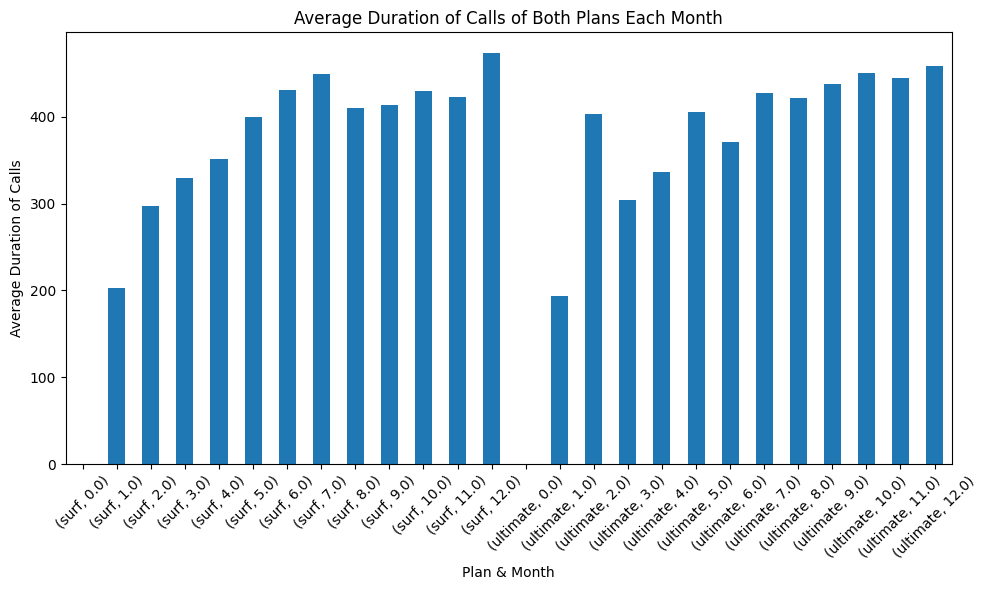

In [35]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
calls_average = total_df_with_plans.groupby(['plan', 'month'])['calls_duration_minutes'].mean()
#print(calls_average)
calls_average.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Plan & Month')
plt.ylabel('Average Duration of Calls')
plt.title('Average Duration of Calls of Both Plans Each Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

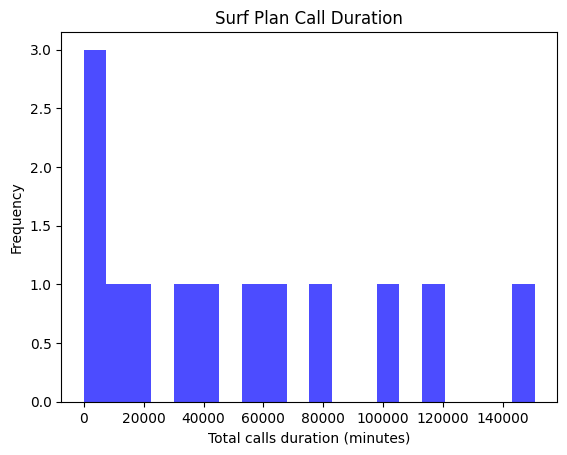

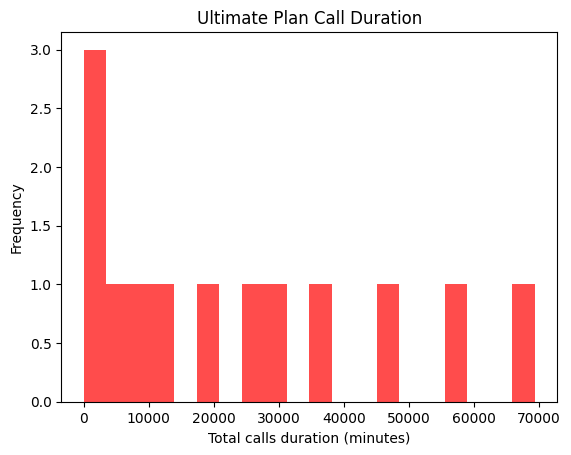

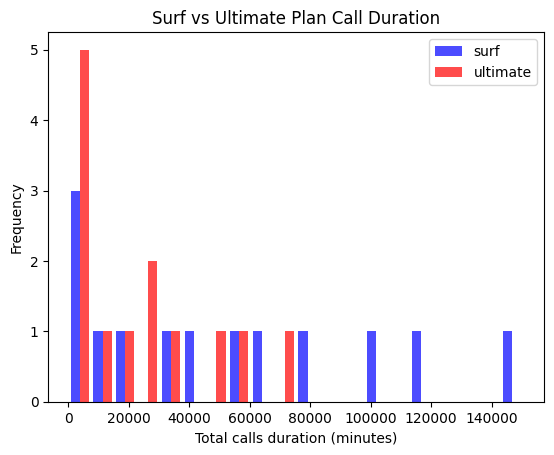

In [36]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
calls_plan_duration = total_df_with_plans.groupby(['plan', 'month'])['calls_duration_minutes'].sum()
#print(calls_plan_duration)
#plt.hist([calls_plan_duration], bins=20, alpha=0.7, label=['plan calls duration']) #I see whats happening here, its combining both plans minutes together.
#plt.show()
surf_duration = calls_plan_duration['surf']
ultimate_duration = calls_plan_duration['ultimate']

plt.hist([surf_duration], bins=20, alpha=0.7, color='blue', label=['surf'])
plt.xlabel('Total calls duration (minutes)')
plt.ylabel('Frequency')
plt.title('Surf Plan Call Duration')
plt.show()

plt.hist([ultimate_duration], bins=20, alpha=0.7, color='red', label=['ultimate'])
plt.xlabel('Total calls duration (minutes)')
plt.ylabel('Frequency')
plt.title('Ultimate Plan Call Duration')
plt.show()

#combining both graphs
plt.hist([surf_duration, ultimate_duration], bins=20, alpha=0.7, color=['blue', 'red'], label=['surf', 'ultimate'])
plt.xlabel('Total calls duration (minutes)')
plt.ylabel('Frequency')
plt.title('Surf vs Ultimate Plan Call Duration')
plt.legend()
plt.show()


[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [37]:
# Calculate the mean and the variance of the monthly call duration
surf_duration_mean = total_df_with_plans[total_df_with_plans['plan'] == 'surf']['calls_duration_minutes'].mean()
surf_duration_variance = total_df_with_plans[total_df_with_plans['plan'] == 'surf']['calls_duration_minutes'].var()
surf_duration_std_dev = total_df_with_plans[total_df_with_plans['plan'] == 'surf']['calls_duration_minutes'].std()
print("Surf call duration average:", surf_duration_mean)
print("Surf call duration variance:", surf_duration_variance)
print("Surf call duration standard deviation", surf_duration_std_dev)

ultimate_duration_mean = total_df_with_plans[total_df_with_plans['plan'] == 'ultimate']['calls_duration_minutes'].mean()
ultimate_duration_variance = total_df_with_plans[total_df_with_plans['plan'] == 'ultimate']['calls_duration_minutes'].var()
ultimate_duration_std_dev = total_df_with_plans[total_df_with_plans['plan'] == 'ultimate']['calls_duration_minutes'].std()
print("Ultimate call duration average:", ultimate_duration_mean)
print("Ultimate call duration variance:", ultimate_duration_variance)
print("Ultimate call duration standard deviation", ultimate_duration_std_dev)


Surf call duration average: 427.12032932235593
Surf call duration variance: 55455.57740014497
Surf call duration standard deviation 235.49007919686335
Ultimate call duration average: 428.0718232044199
Ultimate call duration variance: 58543.878651719744
Ultimate call duration standard deviation 241.9584233948464


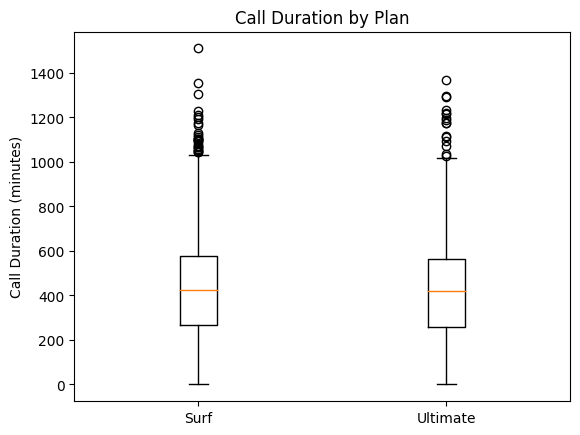

In [38]:
# Plot a boxplot to visualize the distribution of the monthly call duration
surf_data = total_df_with_plans[total_df_with_plans['plan'] == 'surf']['calls_duration_minutes']
ultimate_data = total_df_with_plans[total_df_with_plans['plan'] == 'ultimate']['calls_duration_minutes']

# Create boxplot with multiple datasets
plt.boxplot([surf_data, ultimate_data], labels=['Surf', 'Ultimate'])
plt.title('Call Duration by Plan')
plt.ylabel('Call Duration (minutes)')
plt.show()

[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

Since both of the averages between each plan is roughly the same, there seems to not be significant behavior and 
distribution differences between the plans, which is why both box plots look similar. 
There is a positive skew for both plans which makes sense since everyone uses minutes and 
heavy users will tend to use more, shown by some outliers.  

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Excellent work comparing call usage across plans and months with multiple visualization techniques. Your grouped bar chart, histograms (separated and combined), and boxplot provide a clear picture of the distributions. You also correctly calculated and reported the mean, variance, and standard deviation for both plans, then connected the findings to the visual patterns (positive skew, outliers, and overall similarity between Surf and Ultimate). This is a strong and well-documented analysis step.
</div>


### Messages

Surf messages average: 31.041165294490185
Ultimate messages average: 37.3439226519337


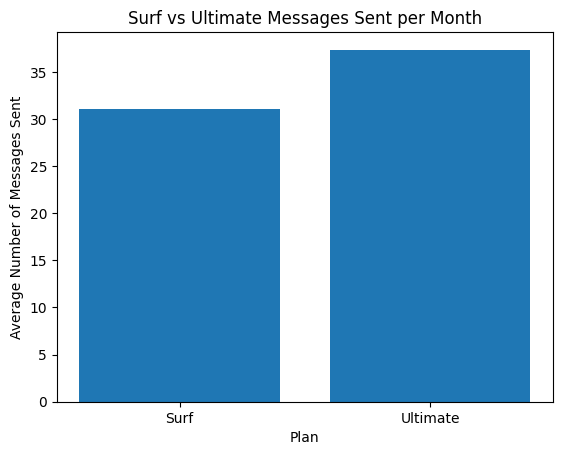

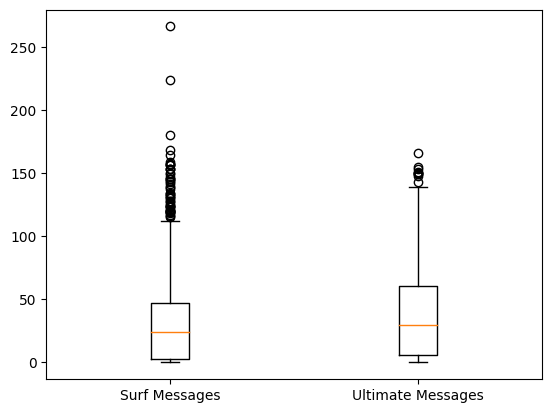

In [39]:
# Compare the number of messages users of each plan tend to send each month
surf_messages = total_df_with_plans[total_df_with_plans['plan'] == 'surf']['num_messages_sent'].mean()
ultimate_messages = total_df_with_plans[total_df_with_plans['plan'] == 'ultimate']['num_messages_sent'].mean()
print('Surf messages average:', surf_messages)
print('Ultimate messages average:', ultimate_messages)

plt.bar(['Surf', 'Ultimate'], [surf_messages, ultimate_messages])
plt.xlabel('Plan')
plt.ylabel('Average Number of Messages Sent')
plt.title('Surf vs Ultimate Messages Sent per Month')
plt.show()

surf_messages_data = total_df_with_plans[total_df_with_plans['plan'] == 'surf']['num_messages_sent']
ultimate_messages_data = total_df_with_plans[total_df_with_plans['plan'] == 'ultimate']['num_messages_sent']
plt.boxplot([surf_messages_data, ultimate_messages_data], labels=['Surf Messages', 'Ultimate Messages'])
plt.show()

Looks like Ultimate plan users send an average of more messages per month than Surf plan users.
Just like the call data, there is positive skewing of the data due to the same reasons.
There seems to be a fair amount of outliers for Surf users going overage on messaging, 
which makes sense due to the Surf plans allowing less messages per month before overage.

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Nicely done analyzing message usage across plans. You clearly calculated and compared the average number of messages, visualized the results with both bar charts and boxplots, and interpreted the skewness and presence of outliers. Highlighting that Ultimate users send more messages on average and connecting Surf’s lower allowance to the outliers shows strong analytical reasoning.
</div>


### Internet

Surf internet traffic average: 16.495364110196327
Ultimate internet traffic average: 17.119590856353593


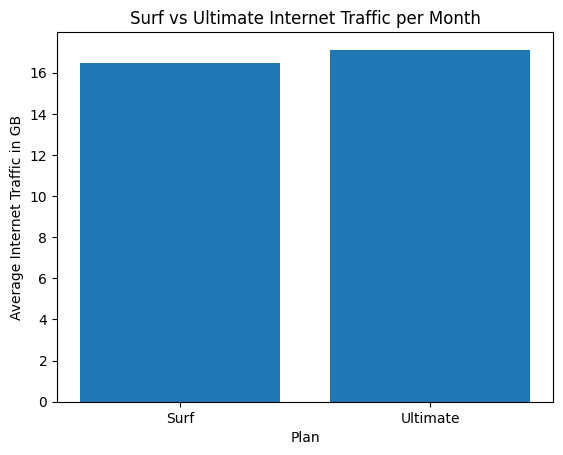

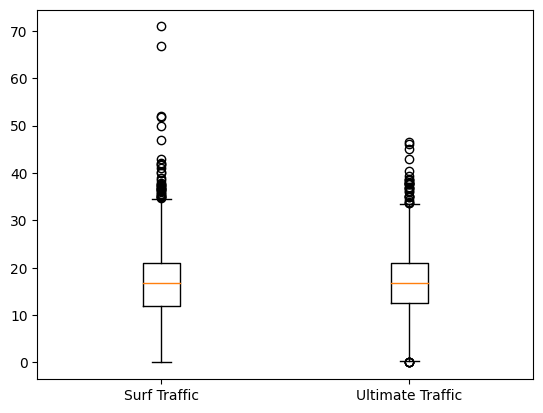

In [40]:
# Compare the amount of internet traffic consumed by users per plan
surf_internet = total_df_with_plans[total_df_with_plans['plan'] == 'surf']['internet_traffic_in_gb'].mean()
ultimate_internet = total_df_with_plans[total_df_with_plans['plan'] == 'ultimate']['internet_traffic_in_gb'].mean()
print('Surf internet traffic average:', surf_internet)
print('Ultimate internet traffic average:', ultimate_internet)

plt.bar(['Surf', 'Ultimate'], [surf_internet, ultimate_internet])
plt.xlabel('Plan')
plt.ylabel('Average Internet Traffic in GB')
plt.title('Surf vs Ultimate Internet Traffic per Month')
plt.show()

surf_internet_data = total_df_with_plans[total_df_with_plans['plan'] == 'surf']['internet_traffic_in_gb']
ultimate_internet_data = total_df_with_plans[total_df_with_plans['plan'] == 'ultimate']['internet_traffic_in_gb']
plt.boxplot([surf_internet_data, ultimate_internet_data], labels=['Surf Traffic', 'Ultimate Traffic'])
plt.show()


In terms of average internet traffic, both plans have roughly the same internet traffic.
Surf users tend to have more users that uses internet data at a higher frequency, 
hence the outliers as compared to Ultimate.  Infact, we can see that some users of Ultimate don't 
even use internet data.  Like the previous graphs, data is positively skewed due to the same reasons.

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Great job comparing internet traffic between Surf and Ultimate plans. You correctly calculated the averages, visualized the results with bar charts and boxplots, and noted key insights: both plans have similar overall usage, Surf users show heavier outliers, and some Ultimate users consume little or no data. Your interpretation of the positive skew is consistent with earlier findings, showing a clear and logical analysis.
</div>


[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

In [41]:
#Since I added the revenue column to the data earlier, we can just sort and proceed :D
surf_revenue = total_df_with_plans[total_df_with_plans['plan'] == 'surf']['revenue']
ultimate_revenue = total_df_with_plans[total_df_with_plans['plan'] == 'ultimate']['revenue']

surf_revenue_average = surf_revenue.mean()
surf_revenue_median = surf_revenue.median()
surf_revenue_variance = surf_revenue.var()
surf_revenue_min = surf_revenue.min()
surf_revenue_max = surf_revenue.max()

print(f"Surf Revenue Average: ${surf_revenue_average:,.2f}")
print(f"Surf Revenue Median: ${surf_revenue_median:,.2f}")
print(f"Surf Revenue Variance: ${surf_revenue_variance:,.2f}")
print(f"Surf Revenue Minimum: ${surf_revenue_min:,.2f}")
print(f"Surf Revenue Maximum: ${surf_revenue_max:,.2f}")

Surf Revenue Average: $63.45
Surf Revenue Median: $43.75
Surf Revenue Variance: $3,290.27
Surf Revenue Minimum: $20.00
Surf Revenue Maximum: $600.37


In [42]:
ultimate_revenue_average = ultimate_revenue.mean()
ultimate_revenue_median = ultimate_revenue.median()
ultimate_revenue_variance = ultimate_revenue.var()
ultimate_revenue_min = ultimate_revenue.min()
ultimate_revenue_max = ultimate_revenue.max()

print(f"Ultimate Revenue Average: ${ultimate_revenue_average:,.2f}")
print(f"Ultimate Revenue Median: ${ultimate_revenue_median:,.2f}")
print(f"Ultimate Revenue Variance: ${ultimate_revenue_variance:,.2f}")
print(f"Ultimate Revenue Minimum: ${ultimate_revenue_min:,.2f}")
print(f"Ultimate Revenue Maximum: ${ultimate_revenue_max:,.2f}")

Ultimate Revenue Average: $72.10
Ultimate Revenue Median: $70.00
Ultimate Revenue Variance: $117.93
Ultimate Revenue Minimum: $67.26
Ultimate Revenue Maximum: $179.73


In [43]:
#Total Revenue
total_revenue = total_df_with_plans.groupby('plan')['revenue'].sum()
print(f"Surf Total Revenue: ${total_revenue['surf']:,.2f}")
print(f"Ultimate Total Revenue: ${total_revenue['ultimate']:,.2f}")

Surf Total Revenue: $100,181.18
Ultimate Total Revenue: $52,198.21


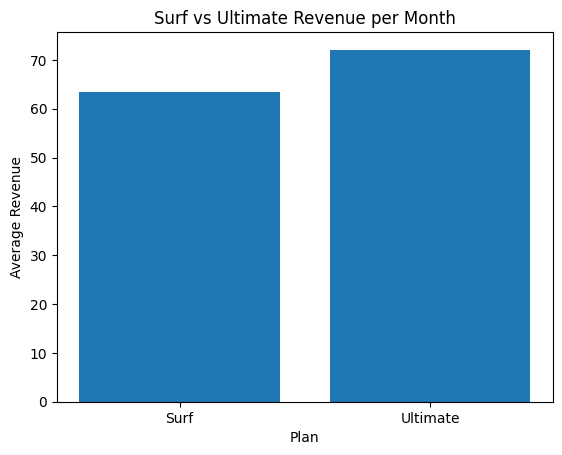

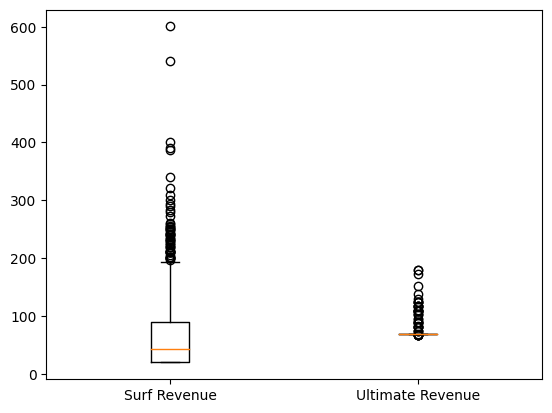

In [44]:
#Average revenue as bar plots
plt.bar(['Surf', 'Ultimate'], [surf_revenue_average, ultimate_revenue_average])
plt.xlabel('Plan')
plt.ylabel('Average Revenue')
plt.title('Surf vs Ultimate Revenue per Month')
plt.show()

#Revenue data as box plots
plt.boxplot([surf_revenue, ultimate_revenue], labels=['Surf Revenue', 'Ultimate Revenue'])
plt.show()

[Formulate conclusions about how the revenue differs between the plans.]

We can see that by total revenue, Surf plan generates more revenue by a large amount.
However the average revenue of surf is less than ultimate.  Surf generates more revenue
than ultimate even though ultimate has a higher rate.  This is due to users having
massive overage in messages as we saw above.  This is interest since we would think that
ultimate, being at a higher rate, would generate more revenue.  People need to watch
how much they are messaging!  We also see negative revenue in both but surf has more.  
This could be due to data management errors so please let me know if there are.  If there isn't,
then it shows potential user behaviors of refunds or other disputes.

New Conclusions:
Now that revenue calculations are fixed (I think).  We can see that the average revenue of surf is $63.45
while the average of ultimate is $72.10.  We see that the median of surf is $43.75 which is more than double
the base rate while the median of ultimate is $70 which matches the base rates.  This means that ultimate users
for the most part don't go over their monthly usage in the plan limit while surf users tend to have overage.  
Ultimate plan generates lower revenue despite being a high rate to surf.  We can see that there are some 
surf outliers with revenue being $600 as max, which shows these users are on the wrong plan if this continues 
over the course of many months.

<div class="alert alert-danger">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Nice job summarizing and visualizing revenue by plan, but the results aren’t reliable until you correct the revenue calculation. Please update your function so it prevents negative overages, uses the correct Ultimate rates (0.01 for minutes/text, 7 for GB), and always applies the monthly base fee. After fixing, re-run this analysis and emphasize average and median revenue per user (since totals mainly reflect plan popularity and revenue data is skewed). 
</div>


## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

Test the hypotheses
H0: The revenue generated from both plans are equal to each other.
H1: The revenue generated from both plans are different.
alpha = 0.05

In [45]:
#Perform two sample t-test since we want both sides
alpha = 0.05
results = st.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)
print(results)

if results.pvalue < alpha:
    print('Since p-value is less than alpha, we can reject the null hypothesis.')
else:
    print('We cannot reject the null hypothesis since the p-value is too big')

Ttest_indResult(statistic=-5.7716251661864115, pvalue=9.217018487595194e-09)
Since p-value is less than alpha, we can reject the null hypothesis.


[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

Test the hypotheses
H0: The revenue generated from NY-NJ areas is equal to the revenue of the other regions.
H1: H0: The revenue generated from NY-NJ areas is different to the revenue of the other regions.
alpha = 0.05

In [46]:
ny_nj_revenue = total_df_with_plans[total_df_with_plans['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['revenue']
other_revenue = total_df_with_plans[total_df_with_plans['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['revenue']
#print(f"NY-NJ revenue data points: {len(ny_nj_revenue)}")
#print(f"Other cities revenue data points: {len(other_revenue)}")
alpha = 0.05
results_ny_nj = st.ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)
print(results_ny_nj)

if results_ny_nj.pvalue < alpha:
    print('Since p-value is less than alpha, we can reject the null hypothesis.')
else:
    print('We cannot reject the null hypothesis since the p-value is too big')

Ttest_indResult(statistic=-1.7195632058710741, pvalue=0.08606073345564534)
We cannot reject the null hypothesis since the p-value is too big


## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

This project was the first to be more hands-off. I had to check my notes on what databases to load since
all the previous projects had it pre-filled. I feel like I definitely made some mistakes in data sorting
and handling.  This project was fun in the fact that I get to decide how I want to organize my data, and 
it definitely took longer than the 3-4 hours estimated.